# Alexandra Green

## Research question/interests

I am researching which MLS playoff winning team has the worst goal differential and how their shots and shots on goal, compare to the team with the best goal differential.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### Team Data for Goal Differential and Yearly Standings

In [2]:
gDifferential = pd.read_csv('../data/raw/all_tables.csv')
print(gDifferential.shape)
gDifferential.head()

(788, 17)


,Pos,Team,GP,W,L,SW,GF,GA,GD,Pts,Qualification,Conference,Year,SL,D,Head-to-head,PPG
0,1.0,Tampa Bay Mutiny,32,19,12,1.0,66,51,+15,58,Playoffs,Eastern Conference,1996,NaN,NaN,NaN,NaN
1,2.0,D.C. United,32,15,16,1.0,62,56,+6,46,Playoffs,Eastern Conference,1996,NaN,NaN,NaN,NaN
2,3.0,NY/NJ MetroStars,32,12,17,3.0,45,47,−2,39,Playoffs,Eastern Conference,1996,NaN,NaN,NaN,NaN
3,4.0,Columbus Crew,32,11,17,4.0,59,60,−1,37,Playoffs,Eastern Conference,1996,NaN,NaN,NaN,NaN
4,5.0,New England Revolution,32,9,17,6.0,43,56,−13,33,NaN,Eastern Conference,1996,NaN,NaN,NaN,NaN


In [5]:
gDifferential.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Pos,GP,W,L,SW,GF,GA,Year,SL,D,PPG
count,744.000000,788.000000,788.000000,788.000000,64.000000,788.000000,788.000000,788.000000,24.000000,724.000000,52.000000
mean,7.420699,30.050761,11.402284,11.572335,3.500000,42.843909,42.838832,2011.454315,3.958333,7.516575,1.385000
std,5.407154,6.915167,4.202540,4.553909,1.825742,13.546747,13.578448,7.159053,1.706233,3.243208,0.369931
min,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,3.000000,1996.000000,0.000000,0.000000,0.700000
25%,3.000000,30.000000,9.000000,9.000000,2.000000,37.000000,37.000000,2006.000000,3.000000,6.000000,1.000000
50%,6.000000,32.000000,12.000000,12.000000,3.000000,44.000000,44.000000,2013.000000,4.000000,8.000000,1.390000
75%,10.000000,34.000000,14.000000,14.250000,5.000000,51.000000,51.000000,2018.000000,5.000000,9.000000,1.700000
max,27.000000,34.000000,24.000000,25.000000,10.000000,85.000000,75.000000,2021.000000,7.000000,18.000000,2.040000


In [6]:
gDifferential.nunique(axis=0)

Pos               27
Team             114
GP                13
W                 24
L                 25
SW                 9
GF                65
GA                66
GD                99
Pts               69
Qualification     86
Conference         7
Year              26
SL                 7
D                 18
Head-to-head       2
PPG               19
dtype: int64

In [7]:
gDifferential.PPG.unique()

array([ nan, 2.04, 1.91, 1.78, 1.7 , 1.39, 1.13, 1.04, 1.  , 0.96, 0.91,
       0.7 , 1.86, 1.77, 1.62, 1.56, 1.55, 1.45, 1.3 , 1.17])

In [21]:
#Dropped columns with more than 40% null values, because it made the dataset very large.
threshold = len(gDifferential) *.40
gDiff_cleaned = gDifferential.copy()
gDiff_cleaned = gDiff_cleaned.dropna(thresh=threshold, axis=1)
#Drop redundant column 'D'
gDiff_cleaned = gDiff_cleaned.drop(['D'], axis=1)
#Drop any null rows
gDiff_cleaned = gDiff_cleaned.dropna(axis=0)
gDiff_cleaned.shape

(744, 11)

<AxesSubplot:>

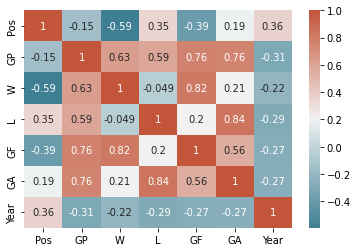

In [26]:
corr = gDiff_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))

In this heatmap, there is a highly positive correlation with goals for and wins, and similarly with goals against and losses.

<AxesSubplot:xlabel='GA', ylabel='L'>

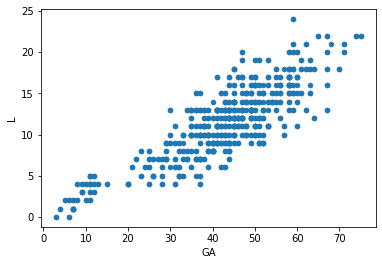

In [31]:
gDiff_cleaned.plot(kind='scatter', x='GA', y='L')

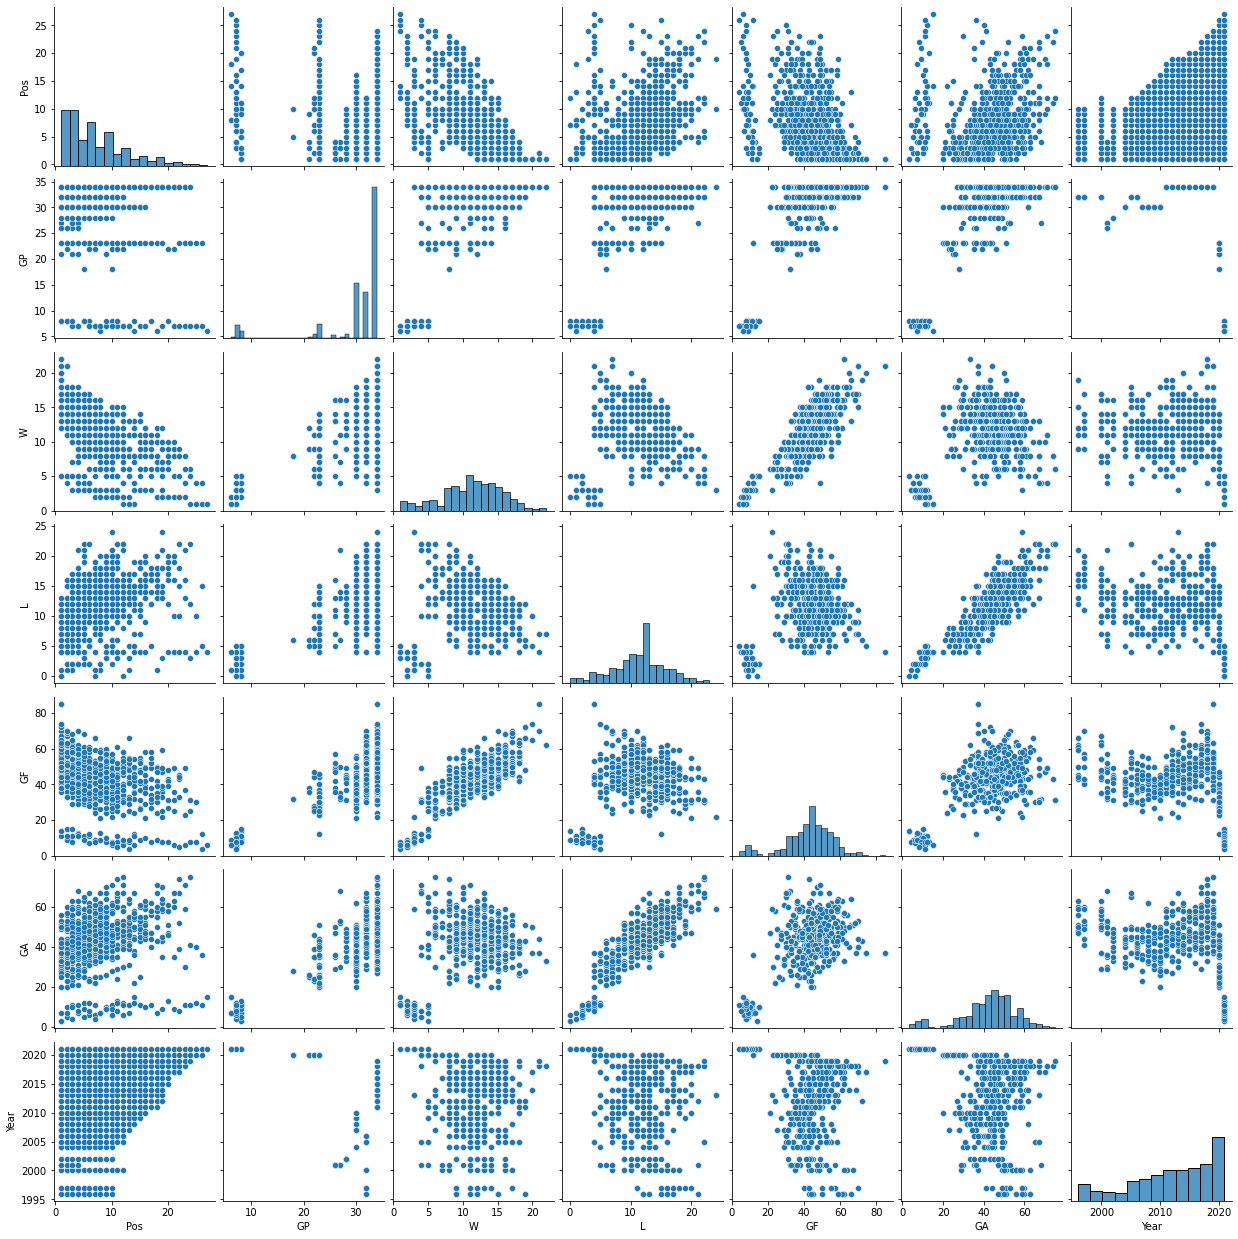

In [34]:
sns.pairplot(gDiff_cleaned)

What's really interesting about this pairplot is the Goals Against and Pos graph. In the heatmap we see the GA has a positive correlation with losses but in the scatterplot, there are teams very close to the 1 position and middle of the pack with very high goals against. There are also teams with little goals against and ended up in the bottom of the rankings. (This may be due to many factors, such as length of season, and amount of teams in the league at the time).

### Player Data for Shots and Shots on Goal

In [38]:
pShots = pd.read_csv('../data/raw/all_players.csv')
print(pShots.shape)
print(pShots.columns)
pShots.head()

(15767, 28)
Index(['Player', 'Club', 'POS', 'GP', 'GS', 'MINS', 'G', 'A', 'SHTS', 'SOG',
       'GWG', 'PKG/A', 'HmG', 'RdG', 'G/90min', 'SC%', 'GWA', 'HmA', 'RdA',
       'A/90min', 'FC', 'FS', 'OFF', 'YC', 'RC', 'SOG%', 'Year', 'Season'],
      dtype='object')


,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


In [44]:
pShots_cleaned = pShots.copy()
pShots_cleaned = pShots_cleaned[['Player', 'Club', 'G', 'SHTS', 'SOG', 'SOG%', 'Year']]
pShots_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
pShots_cleaned = pShots_cleaned.dropna(axis=0)

,Player,Club,G,SHTS,SOG,SOG%,Year
0,Roy Lassiter,TB,27,76,49,64.47,1996
1,Raul Diaz Arce,DC,23,100,49,49.00,1996
2,Eduardo Hurtado,LA,21,87,56,64.37,1996
3,Preki,KC,18,140,61,43.57,1996
4,Brian McBride,CLB,17,79,44,55.70,1996
...,...,...,...,...,...,...,...
15296,Sebastian Mendez,ORL,0,17,3,17.65,2020
15297,Kelyn Rowe,NE,0,17,4,23.53,2020
15298,Siem de Jong,CIN,0,18,5,27.78,2020
15299,Maxime Chanot,NYC,0,19,4,21.05,2020


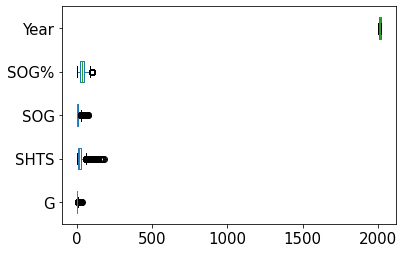

In [45]:
boxplot = pShots_cleaned.boxplot(grid=False, vert=False, fontsize=15)

<AxesSubplot:>

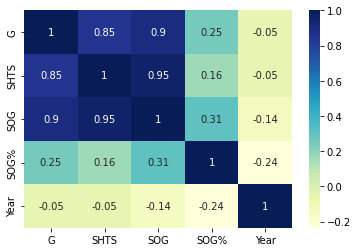

In [46]:
corr2 = pShots_cleaned.corr()
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True, cmap="YlGnBu")